In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

pd.set_option("display.max_columns", None)


#É preciso indicar que o arquivo está usando "," como separador da parte decimal dos números float
df = pd.read_csv('socioeco_usp_ingres_2017 - alter.csv', sep=';', encoding='latin-1', decimal=',')



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Código do Curso de Graduação         106 non-null    object 
 1   Nome do Curso de Graduação           106 non-null    object 
 2   Código do Município do Curso         106 non-null    int64  
 3   Município                            106 non-null    object 
 4   Carreira USP                         106 non-null    int64  
 5   Curso USP                            106 non-null    int64  
 6   P1  Sexo Feminino                   106 non-null    float64
 7   P3  Cor/Raça não Branco             106 non-null    float64
 8   P5  Onde EF Td Pub                  106 non-null    float64
 9   P6  Onde EM Td Pub                  106 non-null    float64
 10  P11  Renda Bruta <1                 106 non-null    float64
 11  P11  Renda Bruta 1 e 2         

In [3]:
df

,Código do Curso de Graduação,Nome do Curso de Graduação,Código do Município do Curso,Município,Carreira USP,Curso USP,P1  Sexo Feminino,P3  Cor/Raça não Branco,P5  Onde EF Td Pub,P6  Onde EM Td Pub,P11  Renda Bruta <1,P11  Renda Bruta 1 e 2,P11  Renda Bruta 2 e 3,P11  Renda Bruta 3 e 5,P11  Renda Bruta 5 e 7,P11  Renda Bruta 7 e 10,P11  Renda Bruta 10 e 15,P11  Renda Bruta 15 e 20,P11  Renda Bruta >20,P15  Instrução Mãe NE,P15  Instrução Mãe EFI,P15  Instrução Mãe EFC,P15  Instrução Mãe EMI,P15  Instrução Mãe EMC,P15  Instrução Mãe ESI,P15  Instrução Mãe ESC,P15  Instrução Mãe PGI,P15  Instrução Mãe PGC,P23  Computadores N,P23  Computadores 1,P23  Computadores 2,P23  Computadores 3,P23  Computadores 4,P28  PASUSP SIM,P29  INCLUSP SIM,P30  INCLUSP?EB SIM,P31  INCLUSP?PPI SIM,P32  Idade 16,P32  Idade 17,P32  Idade 18,P32  Idade 19,P32  Idade 20,P32  Idade 21,P32  Idade 22 a 25,P32  Idade >25,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,TADA  2017,TADA  2018,TADA  2019,TADA  2020,TADA  2021
0,1292746,ADMINISTRAÇÃO,3538709,Piracicaba,101,12,42.9,8.6,14.3,17.1,0.0,2.9,5.7,25.7,17.1,14.3,14.3,11.4,8.6,0.0,0.0,0.0,2.9,17.1,5.7,48.6,2.9,22.9,2.9,34.3,40.0,14.3,8.6,2.9,17.1,11.4,2.9,0.0,22.9,28.6,28.6,11.4,2.9,5.7,0.0,13.2,55.3,31.6,0.0,15.8,7.9,5.3,2.6
1,2880,ARQUITETURA E URBANISMO,3550308,São Paulo,105,13,64.2,18.9,7.5,12.3,0.9,3.8,6.6,9.4,17.9,16.0,14.2,8.5,22.6,0.0,4.7,1.9,0.9,10.4,2.8,48.1,3.8,27.4,0.0,19.8,36.8,27.4,16.0,0.9,12.3,6.6,1.9,0.9,26.4,26.4,29.2,5.7,4.7,2.8,3.8,85.6,2.6,11.8,0.0,2.0,3.9,2.6,3.3
2,2886,ARQUITETURA E URBANISMO,3548906,São Carlos,110,14,67.7,19.3,9.7,9.7,0.0,3.2,9.7,12.9,9.7,22.6,22.6,3.2,16.1,0.0,3.2,0.0,0.0,16.1,9.7,32.3,3.2,35.5,0.0,16.1,32.3,22.6,29.0,0.0,9.7,3.2,3.2,3.2,16.1,22.6,32.3,16.1,6.5,3.2,0.0,74.5,15.7,9.8,0.0,0.0,0.0,2.0,7.8
3,2913/1404436,ARTES CÊNICAS,3550308,São Paulo,115,15,60.0,26.7,23.3,40.0,0.0,6.7,10.0,23.3,10.0,3.3,20.0,10.0,16.7,0.0,3.3,0.0,3.3,16.7,13.3,30.0,0.0,33.3,3.3,30.0,50.0,0.0,16.7,6.7,40.0,23.3,13.3,0.0,26.7,33.3,23.3,3.3,6.7,3.3,3.3,67.9,25.0,7.1,0.0,0.0,0.0,7.1,3.6
4,33343/45510,ARTES VISUAIS,3550308,São Paulo,125,17,83.3,30.0,23.3,33.3,0.0,3.3,16.7,13.3,10.0,16.7,20.0,3.3,16.7,0.0,13.3,3.3,0.0,6.7,6.7,43.3,0.0,26.7,0.0,30.0,36.7,20.0,13.3,6.7,33.3,20.0,3.3,0.0,13.3,26.7,6.7,13.3,6.7,13.3,20.0,48.6,24.3,27.1,0.0,0.0,0.0,10.0,17.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,80507,GEOCIÊNCIAS E EDUCAÇÃO AMBIENTAL,3550308,São Paulo,820,69,35.7,25.0,32.1,28.6,3.6,25.0,21.4,3.6,17.9,7.1,14.3,7.1,0.0,3.6,21.4,7.1,0.0,25.0,3.6,21.4,0.0,17.9,14.3,50.0,14.3,7.1,14.3,7.1,28.6,10.7,0.0,0.0,17.9,7.1,10.7,10.7,3.6,21.4,28.6,23.7,15.8,60.5,0.0,21.1,18.4,0.0,21.1
102,80509,MATEMÁTICA APLICADA A NEGÓCIOS,3543402,Ribeirão Preto,830,74,26.3,23.7,42.1,63.2,2.6,23.7,10.5,18.4,28.9,10.5,0.0,2.6,2.6,0.0,5.3,13.2,2.6,28.9,13.2,21.1,5.3,10.5,5.3,65.8,18.4,5.3,5.3,15.8,60.5,42.1,15.8,0.0,34.2,31.6,15.8,5.3,2.6,7.9,2.6,38.3,25.5,36.2,0.0,17.0,12.8,2.1,4.3
103,51975,OCEANOGRAFIA,3550308,São Paulo,840,75,64.3,42.9,28.6,35.7,0.0,7.1,21.4,32.1,10.7,14.3,3.6,7.1,3.6,0.0,3.6,0.0,0.0,21.4,3.6,46.4,0.0,25.0,7.1,35.7,46.4,10.7,0.0,10.7,35.7,25.0,14.3,0.0,28.6,35.7,17.9,7.1,3.6,7.1,0.0,58.1,23.3,18.6,0.0,9.3,0.0,2.3,7.0
104,60186,QUÍMICA,3543402,Ribeirão Preto,865,79,65.7,28.6,45.7,54.3,0.0,22.9,28.6,25.7,11.4,0.0,5.7,2.9,2.9,0.0,14.3,8.6,5.7,42.9,8.6,11.4,0.0,8.6,5.7,60.0,22.9,8.6,2.9,14.3,54.3,34.3,8.6,0.0,31.4,17.1,20.0,11.4,0.0,14.3,5.7,51.2,25.6,23.3,0.0,14.0,2.3,2.3,4.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Código do Curso de Graduação         106 non-null    object 
 1   Nome do Curso de Graduação           106 non-null    object 
 2   Código do Município do Curso         106 non-null    int64  
 3   Município                            106 non-null    object 
 4   Carreira USP                         106 non-null    int64  
 5   Curso USP                            106 non-null    int64  
 6   P1  Sexo Feminino                   106 non-null    float64
 7   P3  Cor/Raça não Branco             106 non-null    float64
 8   P5  Onde EF Td Pub                  106 non-null    float64
 9   P6  Onde EM Td Pub                  106 non-null    float64
 10  P11  Renda Bruta <1                 106 non-null    float64
 11  P11  Renda Bruta 1 e 2         

In [5]:
print('Média: ', df['Taxa de Desistência Acumulada - TDA'].mean())
print('Médiana: ', df['Taxa de Desistência Acumulada - TDA'].median())
print('Desvio Padrão: ', df['Taxa de Desistência Acumulada - TDA'].std())

Média:  21.560377358490562
Médiana:  18.3
Desvio Padrão:  16.219375122983436


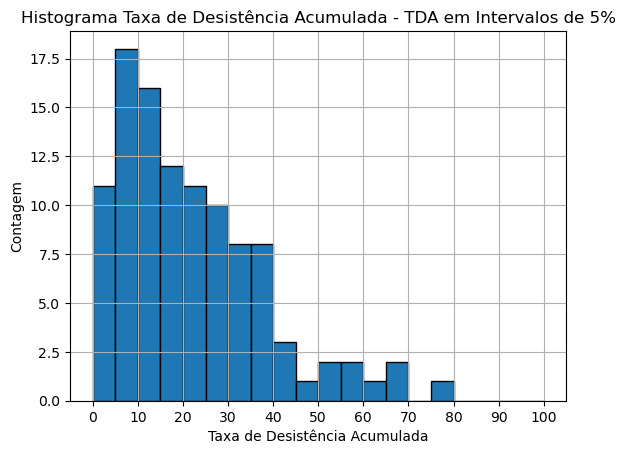

In [6]:
#Vamos verificar o histograma
# Defina os limites das bins em intervalos de 5%
bins = [i for i in range(0 , 101 , 5)]  # Isso cria uma lista de 0 a 100

# Crie o histograma usando o método hist do pandas
df['Taxa de Desistência Acumulada - TDA'].plot(kind='hist', bins=bins, edgecolor='k')

# Personalize o gráfico
plt.title('Histograma Taxa de Desistência Acumulada - TDA em Intervalos de 5%')
plt.xlabel('Taxa de Desistência Acumulada')
plt.ylabel('Contagem')
plt.xticks(range(0, 101, 10))  # Personalize os rótulos do eixo x
plt.grid(True)

# Exiba o gráfico
plt.show()

# Vamos calcular as correlações com a Taxa de Desistência Acumulada

C:\Users\Marcos\AppData\Local\Temp\ipykernel_1040\3806835473.py:15: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


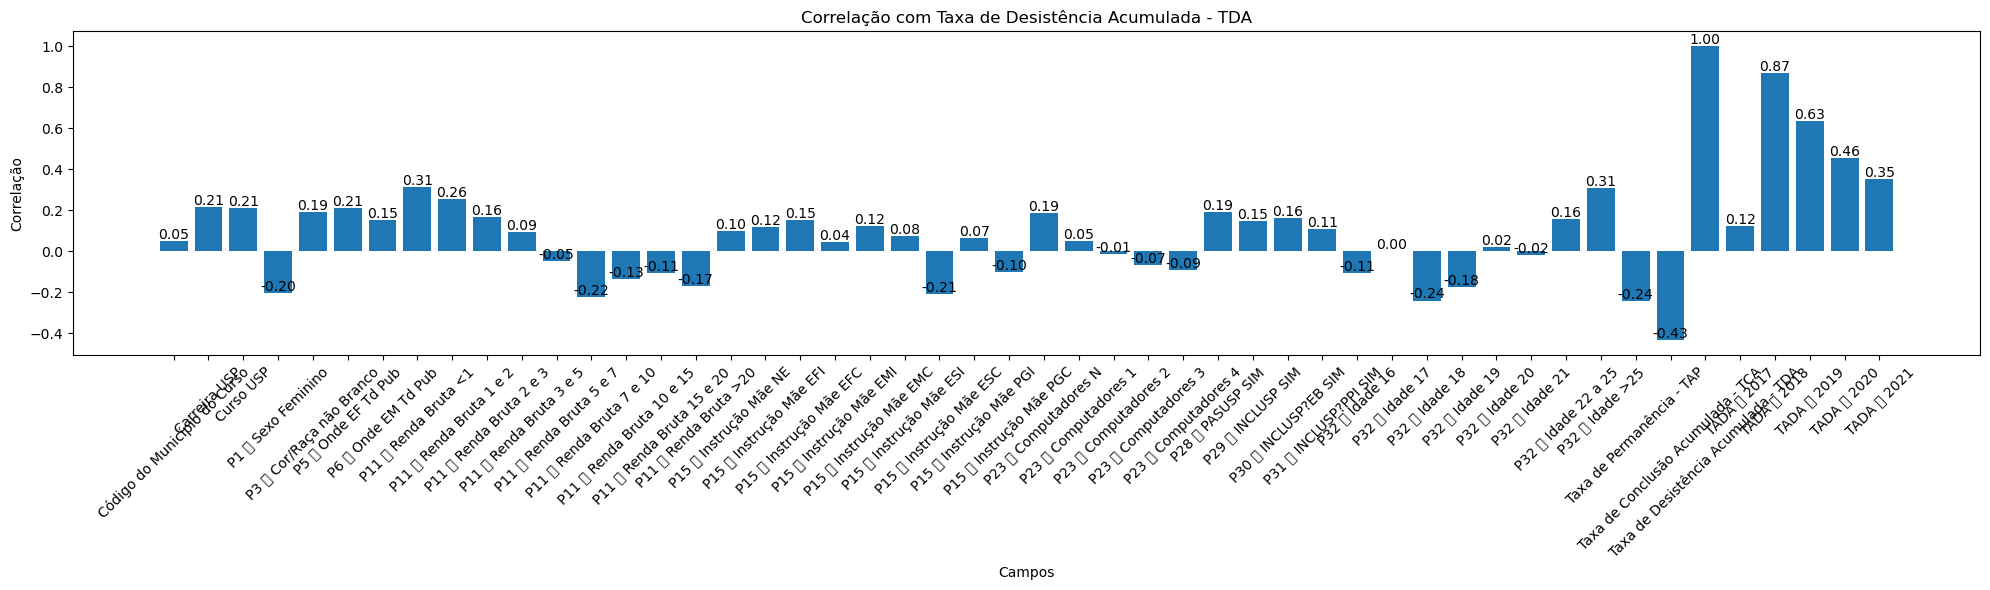

In [7]:
import matplotlib.pyplot as plt
# Escolha o campo que você deseja correlacionar com os outros campos
campo_escolhido = "Taxa de Desistência Acumulada - TDA"

# Calcule as correlações entre o campo escolhido e os outros campos
correlations_geral = df.corr()[campo_escolhido]

# Crie um gráfico de barras para mostrar as correlações
plt.figure(figsize=(20, 6))
bars = plt.bar(correlations_geral.index, correlations_geral.values)
plt.xlabel("Campos")
plt.ylabel("Correlação")
plt.title(f"Correlação com {campo_escolhido}")
plt.xticks(rotation=45)
plt.tight_layout()

for bar, correlation in zip(bars, correlations_geral.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{correlation:.2f}", ha="center")


plt.show()

In [8]:
correlations_geral.sort_values(ascending=False)

Taxa de Desistência Acumulada - TDA    1.000000
TADA  2018                            0.869972
TADA  2019                            0.633064
TADA  2020                            0.455022
TADA  2021                            0.351351
P11  Renda Bruta <1                   0.310904
P32  Idade >25                        0.307843
P11  Renda Bruta 1 e 2                0.255900
Carreira USP                           0.213519
P5  Onde EF Td Pub                    0.208936
Curso USP                              0.208909
P28  PASUSP SIM                       0.192858
P3  Cor/Raça não Branco               0.190189
P23  Computadores N                   0.187780
P11  Renda Bruta 2 e 3                0.164768
P30  INCLUSP?EB SIM                   0.163997
P32  Idade 22 a 25                    0.155689
P6  Onde EM Td Pub                    0.151044
P15  Instrução Mãe EFC                0.150392
P29  INCLUSP SIM                      0.148095
P15  Instrução Mãe EMC                0

# Vamos calcular as correlações com a Taxa de Desistência TADA  2020

C:\Users\Marcos\AppData\Local\Temp\ipykernel_1040\3925994338.py:15: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


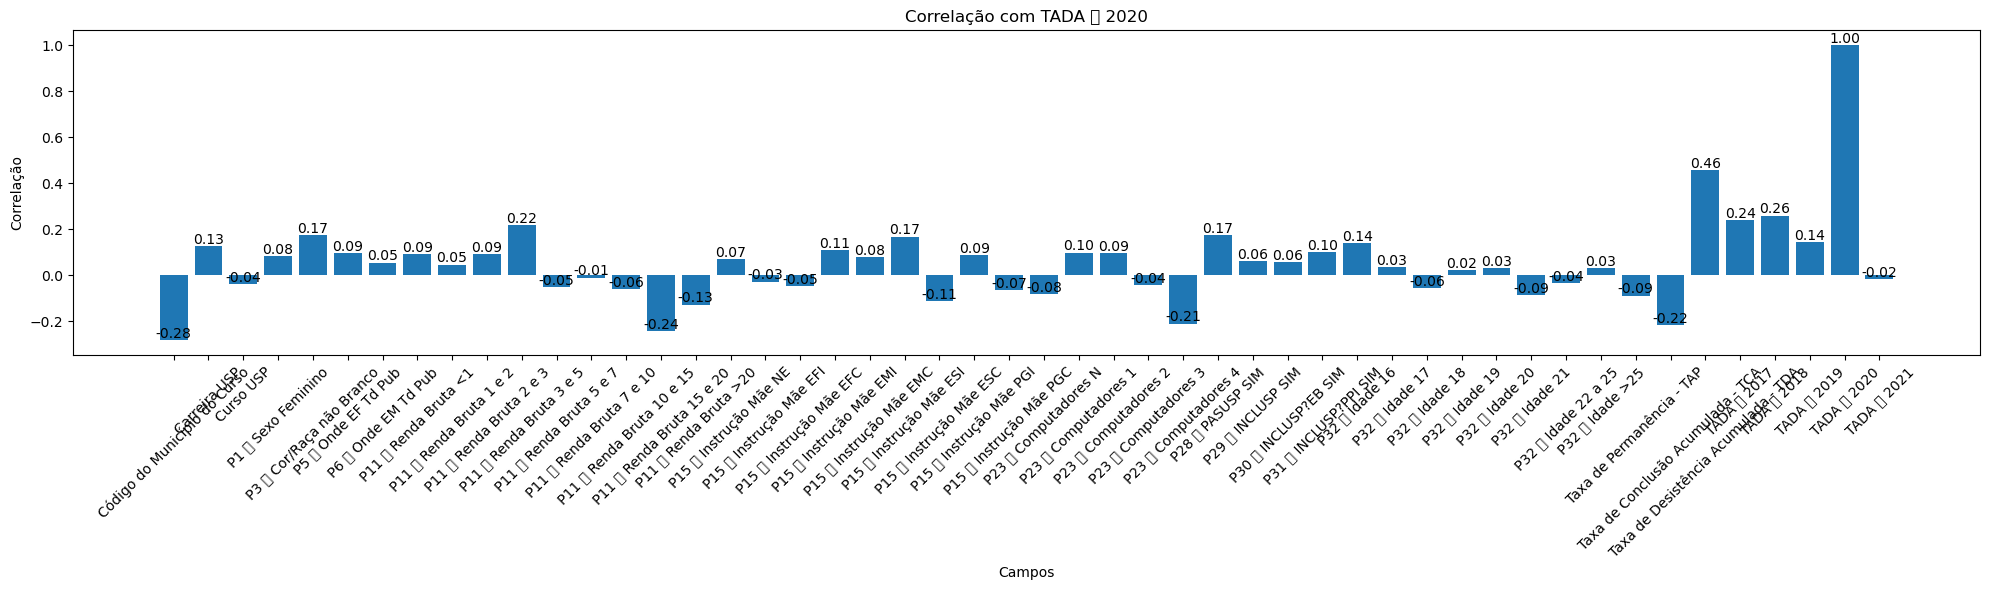

In [28]:
import matplotlib.pyplot as plt
# Escolha o campo que você deseja correlacionar com os outros campos
campo_escolhido = "TADA  2020"

# Calcule as correlações entre o campo escolhido e os outros campos
correlations_geral = df.corr()[campo_escolhido]

# Crie um gráfico de barras para mostrar as correlações
plt.figure(figsize=(20, 6))
bars = plt.bar(correlations_geral.index, correlations_geral.values)
plt.xlabel("Campos")
plt.ylabel("Correlação")
plt.title(f"Correlação com {campo_escolhido}")
plt.xticks(rotation=45)
plt.tight_layout()

for bar, correlation in zip(bars, correlations_geral.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{correlation:.2f}", ha="center")


plt.show()

In [29]:
correlations_geral.sort_values(ascending=False)

TADA  2020                            1.000000
Taxa de Desistência Acumulada - TDA    0.455022
TADA  2018                            0.257904
TADA  2017                            0.238280
P11  Renda Bruta 3 e 5                0.215678
P3  Cor/Raça não Branco               0.174805
P28  PASUSP SIM                       0.172108
P15  Instrução Mãe ESI                0.166421
TADA  2019                            0.142848
P32  Idade 16                         0.139422
Carreira USP                           0.125402
P15  Instrução Mãe EMI                0.107673
P31  INCLUSP?PPI SIM                  0.100542
P23  Computadores 1                   0.098110
P5  Onde EF Td Pub                    0.094783
P23  Computadores 2                   0.094197
P11  Renda Bruta 2 e 3                0.090836
P11  Renda Bruta <1                   0.090467
P15  Instrução Mãe PGI                0.085241
P1  Sexo Feminino                     0.082581
P15  Instrução Mãe EMC                0

In [9]:
# Função para atribuir classe "Abaixo da Média" ou "Acima da Média" com base no TDA
def atribuir_classe(valor, limiar):
    if valor > limiar:
        return 'Acima da Média'
    else:
        return 'Abaixo da Média'


# Aplicar a função à coluna 'Taxa de Desistência Acumulada - TDA' e criar uma nova coluna 'Classe alvo'
media = df['Taxa de Desistência Acumulada - TDA'].mean()
limiar = media
df['Classe alvo'] = df['Taxa de Desistência Acumulada - TDA'].apply(atribuir_classe, args=(limiar,))
df

,Código do Curso de Graduação,Nome do Curso de Graduação,Código do Município do Curso,Município,Carreira USP,Curso USP,P1  Sexo Feminino,P3  Cor/Raça não Branco,P5  Onde EF Td Pub,P6  Onde EM Td Pub,P11  Renda Bruta <1,P11  Renda Bruta 1 e 2,P11  Renda Bruta 2 e 3,P11  Renda Bruta 3 e 5,P11  Renda Bruta 5 e 7,P11  Renda Bruta 7 e 10,P11  Renda Bruta 10 e 15,P11  Renda Bruta 15 e 20,P11  Renda Bruta >20,P15  Instrução Mãe NE,P15  Instrução Mãe EFI,P15  Instrução Mãe EFC,P15  Instrução Mãe EMI,P15  Instrução Mãe EMC,P15  Instrução Mãe ESI,P15  Instrução Mãe ESC,P15  Instrução Mãe PGI,P15  Instrução Mãe PGC,P23  Computadores N,P23  Computadores 1,P23  Computadores 2,P23  Computadores 3,P23  Computadores 4,P28  PASUSP SIM,P29  INCLUSP SIM,P30  INCLUSP?EB SIM,P31  INCLUSP?PPI SIM,P32  Idade 16,P32  Idade 17,P32  Idade 18,P32  Idade 19,P32  Idade 20,P32  Idade 21,P32  Idade 22 a 25,P32  Idade >25,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Desistência Acumulada - TDA,TADA  2017,TADA  2018,TADA  2019,TADA  2020,TADA  2021,Classe alvo
0,1292746,ADMINISTRAÇÃO,3538709,Piracicaba,101,12,42.9,8.6,14.3,17.1,0.0,2.9,5.7,25.7,17.1,14.3,14.3,11.4,8.6,0.0,0.0,0.0,2.9,17.1,5.7,48.6,2.9,22.9,2.9,34.3,40.0,14.3,8.6,2.9,17.1,11.4,2.9,0.0,22.9,28.6,28.6,11.4,2.9,5.7,0.0,13.2,55.3,31.6,0.0,15.8,7.9,5.3,2.6,Acima da Média
1,2880,ARQUITETURA E URBANISMO,3550308,São Paulo,105,13,64.2,18.9,7.5,12.3,0.9,3.8,6.6,9.4,17.9,16.0,14.2,8.5,22.6,0.0,4.7,1.9,0.9,10.4,2.8,48.1,3.8,27.4,0.0,19.8,36.8,27.4,16.0,0.9,12.3,6.6,1.9,0.9,26.4,26.4,29.2,5.7,4.7,2.8,3.8,85.6,2.6,11.8,0.0,2.0,3.9,2.6,3.3,Abaixo da Média
2,2886,ARQUITETURA E URBANISMO,3548906,São Carlos,110,14,67.7,19.3,9.7,9.7,0.0,3.2,9.7,12.9,9.7,22.6,22.6,3.2,16.1,0.0,3.2,0.0,0.0,16.1,9.7,32.3,3.2,35.5,0.0,16.1,32.3,22.6,29.0,0.0,9.7,3.2,3.2,3.2,16.1,22.6,32.3,16.1,6.5,3.2,0.0,74.5,15.7,9.8,0.0,0.0,0.0,2.0,7.8,Abaixo da Média
3,2913/1404436,ARTES CÊNICAS,3550308,São Paulo,115,15,60.0,26.7,23.3,40.0,0.0,6.7,10.0,23.3,10.0,3.3,20.0,10.0,16.7,0.0,3.3,0.0,3.3,16.7,13.3,30.0,0.0,33.3,3.3,30.0,50.0,0.0,16.7,6.7,40.0,23.3,13.3,0.0,26.7,33.3,23.3,3.3,6.7,3.3,3.3,67.9,25.0,7.1,0.0,0.0,0.0,7.1,3.6,Abaixo da Média
4,33343/45510,ARTES VISUAIS,3550308,São Paulo,125,17,83.3,30.0,23.3,33.3,0.0,3.3,16.7,13.3,10.0,16.7,20.0,3.3,16.7,0.0,13.3,3.3,0.0,6.7,6.7,43.3,0.0,26.7,0.0,30.0,36.7,20.0,13.3,6.7,33.3,20.0,3.3,0.0,13.3,26.7,6.7,13.3,6.7,13.3,20.0,48.6,24.3,27.1,0.0,0.0,0.0,10.0,17.1,Acima da Média
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,80507,GEOCIÊNCIAS E EDUCAÇÃO AMBIENTAL,3550308,São Paulo,820,69,35.7,25.0,32.1,28.6,3.6,25.0,21.4,3.6,17.9,7.1,14.3,7.1,0.0,3.6,21.4,7.1,0.0,25.0,3.6,21.4,0.0,17.9,14.3,50.0,14.3,7.1,14.3,7.1,28.6,10.7,0.0,0.0,17.9,7.1,10.7,10.7,3.6,21.4,28.6,23.7,15.8,60.5,0.0,21.1,18.4,0.0,21.1,Acima da Média
102,80509,MATEMÁTICA APLICADA A NEGÓCIOS,3543402,Ribeirão Preto,830,74,26.3,23.7,42.1,63.2,2.6,23.7,10.5,18.4,28.9,10.5,0.0,2.6,2.6,0.0,5.3,13.2,2.6,28.9,13.2,21.1,5.3,10.5,5.3,65.8,18.4,5.3,5.3,15.8,60.5,42.1,15.8,0.0,34.2,31.6,15.8,5.3,2.6,7.9,2.6,38.3,25.5,36.2,0.0,17.0,12.8,2.1,4.3,Acima da Média
103,51975,OCEANOGRAFIA,3550308,São Paulo,840,75,64.3,42.9,28.6,35.7,0.0,7.1,21.4,32.1,10.7,14.3,3.6,7.1,3.6,0.0,3.6,0.0,0.0,21.4,3.6,46.4,0.0,25.0,7.1,35.7,46.4,10.7,0.0,10.7,35.7,25.0,14.3,0.0,28.6,35.7,17.9,7.1,3.6,7.1,0.0,58.1,23.3,18.6,0.0,9.3,0.0,2.3,7.0,Abaixo da Média
104,60186,QUÍMICA,3543402,Ribeirão Preto,865,79,65.7,28.6,45.7,54.3,0.0,22.9,28.6,25.7,11.4,0.0,5.7,2.9,2.9,0.0,14.3,8.6,5.7,42.9,8.6,11.4,0.0,8.6,5.7,60.0,22.9,8.6,2.9,14.3,54.3,34.3,8.6,0.0,31.4,17.1,20.0,11.4,0.0,14.3,5.7,51.2,25.6,23.3,0.0,14.0,2.3,2.3,4.7,Acima da Média


In [10]:
df['Município'].unique()

array(['Piracicaba', 'São Paulo', 'São Carlos', 'Ribeirão Preto', 'Bauru',
       'Pirassununga', 'Lorena'], dtype=object)

In [11]:
# Selecionar colunas de recursos e alvo
X = df[['Município', 'P1  Sexo Feminino', 'P3  Cor/Raça não Branco',
       'P5  Onde EF Td Pub', 'P6  Onde EM Td Pub', 'P11  Renda Bruta <1',
       'P11  Renda Bruta 1 e 2', 'P11  Renda Bruta 2 e 3',
       'P11  Renda Bruta 3 e 5', 'P11  Renda Bruta 5 e 7',
       'P11  Renda Bruta 7 e 10', 'P11  Renda Bruta 10 e 15',
       'P11  Renda Bruta 15 e 20', 'P11  Renda Bruta >20',
       'P15  Instrução Mãe NE', 'P15  Instrução Mãe EFI',
       'P15  Instrução Mãe EFC', 'P15  Instrução Mãe EMI',
       'P15  Instrução Mãe EMC', 'P15  Instrução Mãe ESI',
       'P15  Instrução Mãe ESC', 'P15  Instrução Mãe PGI',
       'P15  Instrução Mãe PGC', 'P23  Computadores N',
       'P23  Computadores 1', 'P23  Computadores 2', 'P23  Computadores 3',
       'P23  Computadores 4', 'P28  PASUSP SIM', 'P29  INCLUSP SIM',
       'P30  INCLUSP?EB SIM', 'P31  INCLUSP?PPI SIM', 'P32  Idade 16',
       'P32  Idade 17', 'P32  Idade 18', 'P32  Idade 19', 'P32  Idade 20',
       'P32  Idade 21', 'P32  Idade 22 a 25', 'P32  Idade >25',
       ]]  # Variáveis preditoras
y = df['Classe alvo']  # Variável alvo

In [12]:
X['Município']

0          Piracicaba
1           São Paulo
2          São Carlos
3           São Paulo
4           São Paulo
            ...      
101         São Paulo
102    Ribeirão Preto
103         São Paulo
104    Ribeirão Preto
105    Ribeirão Preto
Name: Município, Length: 106, dtype: object

In [13]:
# Codificar as colunas categóricas para números usando LabelEncoder
label_encoder = LabelEncoder()

for column in X.columns:
    if type(X[column][0]) == str:
        X[column] = label_encoder.fit_transform(X[column])


X['Município']

C:\Users\Marcos\AppData\Local\Temp\ipykernel_1040\267217191.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])


0      2
1      6
2      5
3      6
4      6
      ..
101    6
102    4
103    6
104    4
105    4
Name: Município, Length: 106, dtype: int32

# Como são poucos dados, vamos utilizar o método Leave One Out

In [14]:
# Inicializar uma lista para armazenar os resultados de acurácia
accuracies = []

# Inicializar o objeto Leave One Out
loo = LeaveOneOut()

# Inicializar uma lista para armazenar as importâncias das características em cada iteração
feature_importances_list = []

# Iterar sobre os índices gerados pelo Leave One Out
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Criar um modelo de Árvore de Decisão
    model = DecisionTreeClassifier(random_state=42)
    
    # Treinar o modelo com os dados de treinamento
    model.fit(X_train, y_train)
    
    # Obter importâncias das características e armazenar
    feature_importances = model.feature_importances_
    feature_importances_list.append(feature_importances)
    
    # Fazer previsões nos dados de teste
    y_pred = model.predict(X_test)
    
    # Avaliar a precisão do modelo para esta iteração e armazenar
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calcular a média das importâncias das características em todas as iterações
mean_feature_importances = np.mean(feature_importances_list, axis=0)

# Criar um DataFrame para visualização das importâncias
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': mean_feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir as características mais importantes
print(importance_df)    
    
# Calcular a média das precisões em todas as iterações
mean_accuracy = sum(accuracies) / len(accuracies)

# Exibir a média da acurácia
print(f'Média da Acurácia LOO: {mean_accuracy:.2f}')

                      Feature  Importance
10   P11  Renda Bruta 7 e 10    0.214129
1          P1  Sexo Feminino    0.136075
38        P32  Idade 22 a 25    0.121364
5        P11  Renda Bruta <1    0.108123
15    P15  Instrução Mãe EFI    0.045179
39            P32  Idade >25    0.039705
13      P11  Renda Bruta >20    0.036521
14     P15  Instrução Mãe NE    0.035643
18    P15  Instrução Mãe EMC    0.035393
3         P5  Onde EF Td Pub    0.032885
27       P23  Computadores 4    0.032821
36             P32  Idade 20    0.027908
20    P15  Instrução Mãe ESC    0.021353
22    P15  Instrução Mãe PGC    0.020253
6     P11  Renda Bruta 1 e 2    0.019817
4         P6  Onde EM Td Pub    0.013762
34             P32  Idade 18    0.007320
25       P23  Computadores 2    0.006716
7     P11  Renda Bruta 2 e 3    0.006645
9     P11  Renda Bruta 5 e 7    0.005565
37             P32  Idade 21    0.005173
32             P32  Idade 16    0.004436
35             P32  Idade 19    0

In [15]:
feature_importances_list[0]

array([0.        , 0.19566008, 0.        , 0.        , 0.        ,
       0.11358173, 0.04846154, 0.        , 0.        , 0.        ,
       0.218189  , 0.03854895, 0.02019231, 0.        , 0.03786058,
       0.0337113 , 0.        , 0.        , 0.05258186, 0.        ,
       0.01910083, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02019231,
       0.        , 0.04895105, 0.        , 0.12066077, 0.03230769])

In [16]:
accuracies

[0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0]

In [17]:
#E se utilzássemos o algoritmo Random Forest?
from sklearn.ensemble import RandomForestClassifier

# Inicializar uma lista para armazenar os resultados de acurácia
accuracies = []

# Inicializar o objeto Leave One Out
loo = LeaveOneOut()

# Inicializar uma lista para armazenar as importâncias das características em cada iteração
feature_importances_list = []

# Iterar sobre os índices gerados pelo Leave One Out
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Criar um modelo de Árvore de Decisão
    model = RandomForestClassifier(n_estimators=200, random_state=42)
    
    # Treinar o modelo com os dados de treinamento
    model.fit(X_train, y_train)
    
    # Obter importâncias das características e armazenar
    feature_importances = model.feature_importances_
    feature_importances_list.append(feature_importances)
    
    # Fazer previsões nos dados de teste
    y_pred = model.predict(X_test)
    
    # Avaliar a precisão do modelo para esta iteração e armazenar
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calcular a média das importâncias das características em todas as iterações
mean_feature_importances = np.mean(feature_importances_list, axis=0)

# Criar um DataFrame para visualização das importâncias
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': mean_feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir as características mais importantes
print(importance_df)    
    
# Calcular a média das precisões em todas as iterações
mean_accuracy = sum(accuracies) / len(accuracies)

# Exibir a média da acurácia
print(f'Média da Acurácia LOO: {mean_accuracy:.2f}')

                      Feature  Importance
10   P11  Renda Bruta 7 e 10    0.065586
1          P1  Sexo Feminino    0.053942
39            P32  Idade >25    0.041412
9     P11  Renda Bruta 5 e 7    0.037401
20    P15  Instrução Mãe ESC    0.034423
34             P32  Idade 18    0.032747
15    P15  Instrução Mãe EFI    0.032197
3         P5  Onde EF Td Pub    0.029234
13      P11  Renda Bruta >20    0.028689
35             P32  Idade 19    0.028469
38        P32  Idade 22 a 25    0.028105
29          P29  INCLUSP SIM    0.027986
31      P31  INCLUSP?PPI SIM    0.027707
18    P15  Instrução Mãe EMC    0.026813
4         P6  Onde EM Td Pub    0.026703
25       P23  Computadores 2    0.026418
6     P11  Renda Bruta 1 e 2    0.026197
28           P28  PASUSP SIM    0.025553
5        P11  Renda Bruta <1    0.024817
11  P11  Renda Bruta 10 e 15    0.024391
8     P11  Renda Bruta 3 e 5    0.024253
36             P32  Idade 20    0.023345
2    P3  Cor/Raça não Branco    0

In [18]:
#E se utilzássemos o algoritmo Regressão Logística?
from sklearn.linear_model import LogisticRegression

# Inicializar uma lista para armazenar os resultados de acurácia
accuracies = []

# Inicializar o objeto Leave One Out
loo = LeaveOneOut()

# Inicializar uma lista para armazenar as importâncias das características em cada iteração
feature_importances_list = []

# Iterar sobre os índices gerados pelo Leave One Out
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Criar um modelo de Árvore de Decisão
    model = LogisticRegression(max_iter=10000, random_state=42)
    
    # Treinar o modelo com os dados de treinamento
    model.fit(X_train, y_train)
      
    # Fazer previsões nos dados de teste
    y_pred = model.predict(X_test)
    
    # Avaliar a precisão do modelo para esta iteração e armazenar
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


# Calcular a média das precisões em todas as iterações
mean_accuracy = sum(accuracies) / len(accuracies)

# Exibir a média da acurácia
print(f'Média da Acurácia LOO: {mean_accuracy:.2f}')

Média da Acurácia LOO: 0.58


In [19]:
#E se usássemos uma Rede Neural?
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [20]:
#Preprocessamento
#A classe alvo precisa estar como 0 ou 1
mapeamento = {
    'Acima da Média': 1,
    'Abaixo da Média': 0,
}


# Aplicar a transformação usando a função map do pandas
y = y.map(mapeamento)

y

0      1
1      0
2      0
3      0
4      1
      ..
101    1
102    1
103    0
104    1
105    0
Name: Classe alvo, Length: 106, dtype: int64

In [21]:
# Padronizar as features (opcional, mas geralmente recomendado)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Dividir os dados em conjunto de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
# Defina o número de neurônios em cada camada
hidden_layer_sizes = (50, 30, 10, 5)  # Duas camadas ocultas com 50 e 30 neurônios, respectivamente

model_rn = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='logistic', max_iter=1000, random_state=13)
model_rn.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 30, 10, 5),
              max_iter=1000, random_state=13)

In [27]:
y_pred = model_rn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo nos dados de teste:", accuracy)

Acurácia do modelo nos dados de teste: 0.36363636363636365
